## 분석 방향

### 매출액(연 지표)과 급여(월 지표)의 대응
- 급여를 연 단위 총 급여로 변경

### 연간 총 급여 대비 연 매출액 비율 분석
- 매년 급여대비 매출 산출 -> 해당 회사 전 기간의 급여대비 매출의 평균 도출 (급여대비_매출평균)
- 평균적으로 급여의 몇배의 매출을 내고 있는지를 의미

### 연별 변동 추세를 분석하는 것은 힘들다
- 과제 data 상 연단위 결측치가 매우 많음
- 급여대비 매출의 연간 변화추이를 분석하는 것은 어렵다

### 급여대비 매출의 평균이 높다면?
- 비용 대비 효율성이 높다.
- 잉여 자산이 많아져 앞으로 사업의 양적 확장 가능성이 높다.

## 소거법

### 아무런 기업도 소거하지 않고 분석했을 경우, 극단치 발생
- ex) 567650 기업 :  매출액 1000억원+, 직원수 3명, 급여대비 매출 평균 3386

### 유니콘은 1조원 이상의 기업가치를 가지는 기업
- 1조원 이상의 가치를 가지는 기업이 한자리 수의 직원으로 유지, 성장할 수 있을까?
- 직원 수를 기준으로 한 소거가 필요하다.

### 현 유니콘 / 예비유니콘 기업의 값을 기준으로 적용
- 현 유니콘 기업(최대 직원수 기준) 최소값 121
- 중소벤처기업부 - 예비유니콘 선정 된 기업 중 가장 적은 직원 수의 기업이 47명 (디스이즈엔지니어링)
- 아래의 분석에서는 직원수 40+인 기업으로 필터링

## DB세팅

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.options.display.float_format = '{:.0f}'.format

plt.rcParams['font.family'] = 'Malgun Gothic'  
plt.rcParams['axes.unicode_minus'] = False

In [236]:
company = pd.read_csv("sales_wage_df.csv",index_col=0)
unicorn = pd.read_csv("unicorn_sales_wage_df.csv",index_col=0)

In [237]:
company['15_급여대비_매출'] = company['15_매출액']*1000 / company['15_총급여']
company['16_급여대비_매출'] = company['16_매출액']*1000 / company['16_총급여']
company['17_급여대비_매출'] = company['17_매출액']*1000 / company['17_총급여']
company['18_급여대비_매출'] = company['18_매출액']*1000 / company['18_총급여']
company['19_급여대비_매출'] = company['19_매출액']*1000 / company['19_총급여']

In [238]:
company['급여대비_매출평균'] = company.loc[:, '15_급여대비_매출' : '19_급여대비_매출'].mean(axis=1)

In [239]:
unicorn['15_급여대비_매출'] = unicorn['15_매출액']*1000 / unicorn['15_총급여']
unicorn['16_급여대비_매출'] = unicorn['16_매출액']*1000 / unicorn['16_총급여']
unicorn['17_급여대비_매출'] = unicorn['17_매출액']*1000 / unicorn['17_총급여']
unicorn['18_급여대비_매출'] = unicorn['18_매출액']*1000 / unicorn['18_총급여']
unicorn['19_급여대비_매출'] = unicorn['19_매출액']*1000 / unicorn['19_총급여']

In [240]:
unicorn['급여대비_매출평균'] = unicorn.loc[:, '15_급여대비_매출' : '19_급여대비_매출'].mean(axis=1)

## 급여대비 매출액 분석

In [242]:
# 직원 수 최소 47명 기업으로 필터링
company = company.query('최대_직원수 >= 47')

In [243]:
co = company['급여대비_매출평균']
un = unicorn['급여대비_매출평균']

In [244]:
# 일반 집단 75% 값 < 유니콘 기업 50% 값
# 일반 집단 평균 14 < 유니콘 기업 평균 95
# 유니콘 기업은 전반적으로 높은 분포를 보인다

print(co.describe())
print(un.describe())

count   573
mean     14
std      27
min       0
25%       4
50%       8
75%      16
max     363
Name: 급여대비_매출평균, dtype: float64
count    11
mean     95
std     154
min       1
25%      12
50%      21
75%      73
max     463
Name: 급여대비_매출평균, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


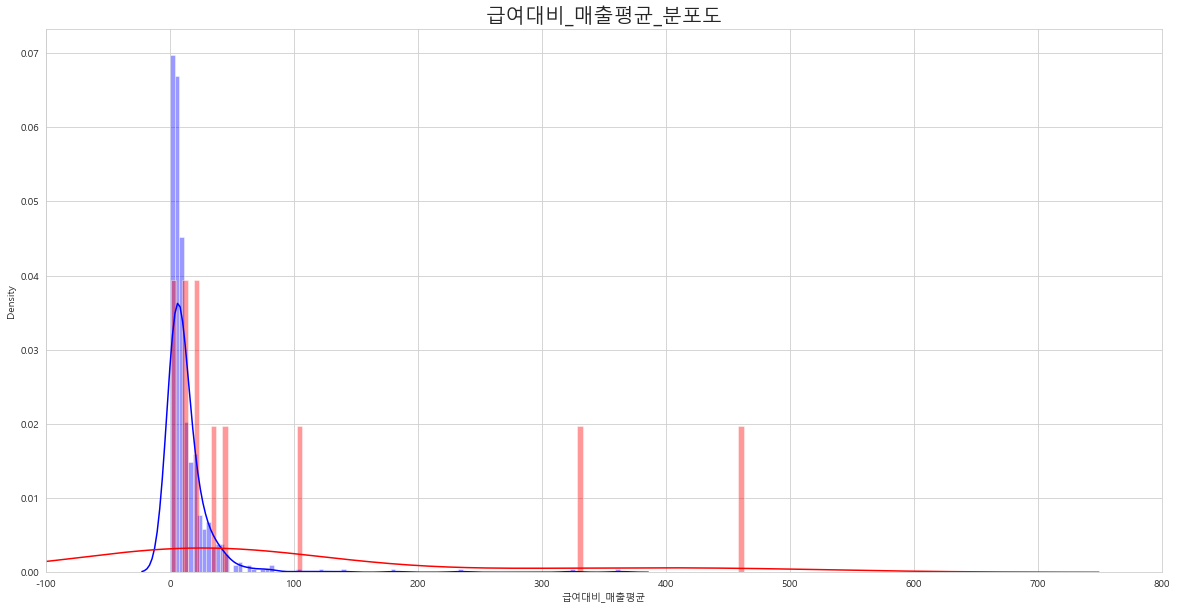

In [230]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.set_title('급여대비_매출평균_분포도', fontsize = 20)
sns.distplot(co, ax=ax, color='blue', bins=100)
sns.distplot(un, ax=ax, color='red', bins=100)
ax.set_xlim(-100,800)
plt.show()

In [245]:
top_10 = company.sort_values(by='급여대비_매출평균', ascending = False).head(10)['급여대비_매출평균']
top_10

회사ID
382850   363
294649   324
232757   234
381180   181
297327   140
130729   122
63       104
130387    81
426429    81
126831    77
Name: 급여대비_매출평균, dtype: float64

## 결론

- 유니콘 기업은 일반 기업군에 비해 높은 급여대비 매출 분포를 나타냄.
- 따라서 해당 Feature의 높은 ranking을 보이는 기업들을 고려해 볼 필요가 있다고 보임.
- 상위 n개 기업 선정 결과
    1. 382850
    2. 294649
    3. 232757
    4. 381180
    5. 297327
    6. 130729
    7. 63
    8. 130387
    9. 426429
    10. 126831